# INSTRUÇÃO PRÁTICA - IP-P010
## PP - PROGRAMAÇÃO EM PYTHON
### OBJETIVOS DA ATIVIDADE

Exercício 1: Gerando o DataFrame__

Desta forma fica disponível o script ``faker`` e o módulo para geração de dados falsos.

Utilizando este módulo, fere um data frame contendo as seguintes colunas

- CPF;
- Nme;
- Idade (entre 18 e 28);
- Sexo;
- Endereço de email;
- Nota no ENEM (entre 640 e 800)
- Abandono (True o False)
- Qual semestre (entre 1 e 8, se Abandono for True)
- CRA após o segundo semestre (float entre 5 e 10)
- CRA após o quarto semestre (float entre 5 e 10)
- CRA após o Sexto semestre (float entre 5 e 10)

In [2]:
import pandas as pd
from faker import Faker
import random
import os

fake = Faker()
random.seed(42)

def gerar_dados_falsos(num_registros=1000):
    data = []
    for _ in range(num_registros):
        cpf = fake.unique.random_number(digits=11)
        nome = fake.name()
        sexo = fake.random_element(elements=('Masculino', 'Feminino')) if nome.split()[0][-1] != 'a' else 'Feminino'
        idade = fake.random_int(min=18, max=28)
        email = fake.email()
        nota_enem = fake.random_int(min=640, max=800)
        abandono = random.choices([True, False], weights=[0.3, 0.7])[0]
        semestre = fake.random_int(min=1, max=8) if abandono else None
        cra_segundo_semestre = fake.pyfloat(min_value=5, max_value=10, right_digits=2)
        cra_quarto_semestre = fake.pyfloat(min_value=5, max_value=10, right_digits=2)
        cra_sexto_semestre = fake.pyfloat(min_value=5, max_value=10, right_digits=2)

        data.append([cpf, nome, idade, sexo, email, nota_enem, abandono, semestre, cra_segundo_semestre, cra_quarto_semestre, cra_sexto_semestre])

    return data

def salvar_dataframe_para_csv(df, caminho_arquivo):
    diretorio = os.path.dirname(caminho_arquivo)
    if not os.path.exists(diretorio):
        os.makedirs(diretorio)

    # Verificar se o arquivo já existe antes de salvar
    if os.path.exists(caminho_arquivo):
        print(f"Aviso: O arquivo {caminho_arquivo} já existe. Considere renomeá-lo ou removê-lo.")

    df.to_csv(caminho_arquivo, index=False)

# Gerar dados
dados = gerar_dados_falsos(1000)

# Criar DataFrame
df = pd.DataFrame(dados, columns=['CPF', 'Nome', 'Idade', 'Sexo', 'Email', 'Nota ENEM', 'Abandono', 'Qual Semestre', 'CRA após o 2º Semestre', 'CRA após o 4º Semestre', 'CRA após o 6º Semestre'])

# Salvar DataFrame em CSV
salvar_dataframe_para_csv(df, 'C:/Users/cat-r/Documents/P10/enem_dado.csv')

# Exibir DataFrame
display(df)


Aviso: O arquivo C:/Users/cat-r/Documents/P10/enem_dado.csv já existe. Considere renomeá-lo ou removê-lo.


,CPF,Nome,Idade,Sexo,Email,Nota ENEM,Abandono,Qual Semestre,CRA após o 2º Semestre,CRA após o 4º Semestre,CRA após o 6º Semestre
0,23003043532,Johnathan Baker,26,Feminino,ivanrodriguez@example.org,649,False,NaN,5.76,5.19,6.57
1,83990541366,Dawn Williams,26,Feminino,andrea87@example.org,733,True,6.0,8.15,8.90,5.41
2,22858085508,Brandon Brown,18,Masculino,james01@example.net,727,True,4.0,6.15,8.25,9.28
3,82871242412,Kathryn Cooper,23,Feminino,hwilson@example.com,744,True,6.0,6.40,7.41,9.35
4,40415716168,Larry Coleman,28,Masculino,bhess@example.com,649,False,NaN,8.74,8.30,8.43
...,...,...,...,...,...,...,...,...,...,...,...
995,74491678953,Mrs. Nancy Gutierrez,26,Feminino,cgreen@example.org,780,True,7.0,7.20,6.91,7.85
996,88935150468,Jennifer Shepard,19,Feminino,kthomas@example.org,785,False,NaN,5.96,9.20,6.15
997,12808241094,Anne Moody,20,Feminino,logan57@example.net,792,False,NaN,6.21,7.65,9.46
998,82439269373,Amanda Wiggins,28,Feminino,phoffman@example.org,782,False,NaN,5.55,9.71,7.13


1- Identifique a relação de alunos de sexo masculino e feminino no conjunto:

In [10]:
sexo_counts = df['Sexo'].value_counts()
print(sexo_counts)


Sexo
Feminino     584
Masculino    416
Name: count, dtype: int64


2- Dado que os alunos tem idade entre 18 e 28 anos, mostre qual a média da nota do ENEM dos alunos agrupados por idade.

In [11]:
idade_media_nota = df.groupby('Idade')['Nota ENEM'].mean()
print(idade_media_nota)


Idade
18    719.591398
19    708.000000
20    721.265306
21    723.046512
22    714.786667
23    720.085366
24    723.400000
25    715.972222
26    720.829545
27    722.480392
28    727.413793
Name: Nota ENEM, dtype: float64


3- 3. Normalize as notas do ENEM de todos os alunos para um valor entre 5 e 10.

In [12]:
min_nota_enem = df['Nota ENEM'].min()
max_nota_enem = df['Nota ENEM'].max()
df['Nota ENEM Normalizada'] = 5 + ((df['Nota ENEM'] - min_nota_enem) / (max_nota_enem - min_nota_enem)) * 5
display(df[['Nota ENEM', 'Nota ENEM Normalizada']])


,Nota ENEM,Nota ENEM Normalizada
0,764,8.87500
1,729,7.78125
2,735,7.96875
3,668,5.87500
4,752,8.50000
...,...,...
995,743,8.21875
996,708,7.12500
997,737,8.03125
998,758,8.68750


4- Faça um gráfico de evolução das notas, desde o ENEM até CRA do sexto semestre para os 10 alunos com melhor CRA no sexto semestre. Utilize a nota do ENEM normalizada. coloque no gráfico círculos se o aluno for de sexo feminino e quadrados se for masculino.

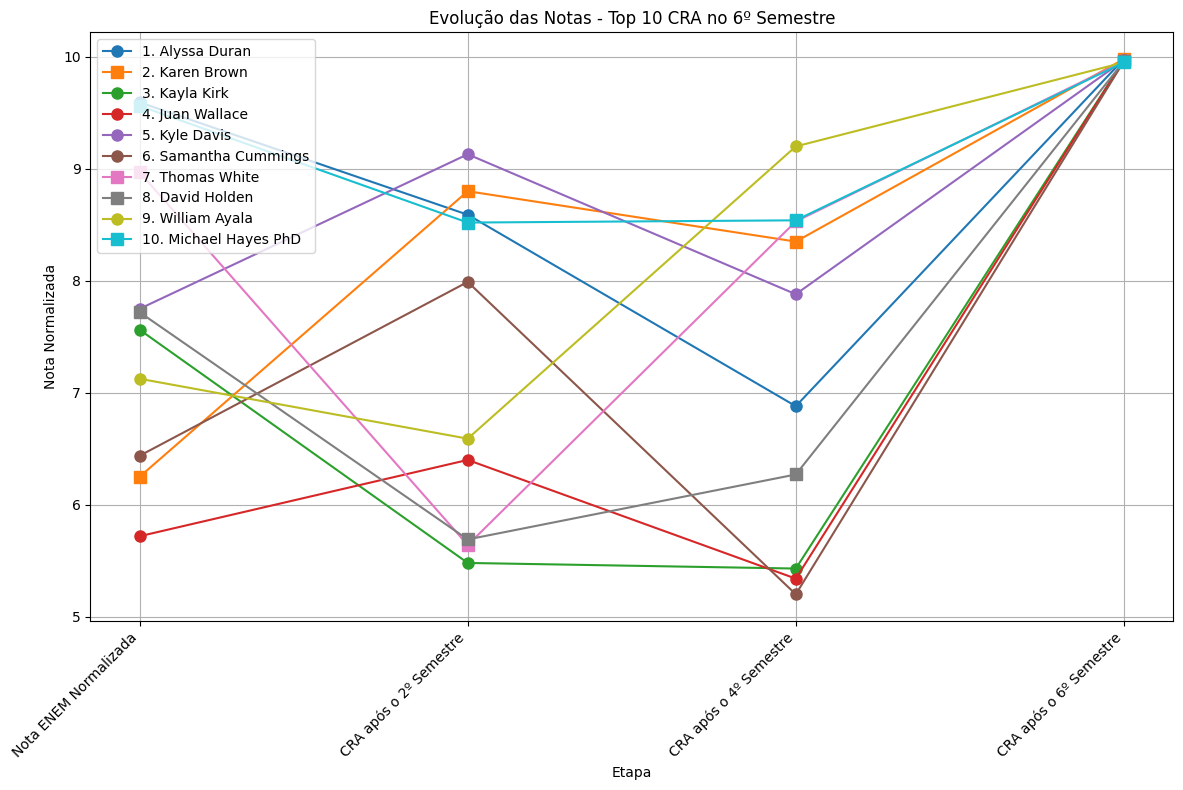

In [14]:
import matplotlib.pyplot as plt

top_10_cra_sexto = df.nlargest(10, 'CRA após o 6º Semestre')
markers = {'Masculino': 's', 'Feminino': 'o'}

plt.figure(figsize=(12, 8))
for i, (index, row) in enumerate(top_10_cra_sexto.iterrows()):
    marker = markers[row['Sexo']]
    plt.plot(['Nota ENEM Normalizada', 'CRA após o 2º Semestre', 'CRA após o 4º Semestre', 'CRA após o 6º Semestre'],
             [row['Nota ENEM Normalizada'], row['CRA após o 2º Semestre'], row['CRA após o 4º Semestre'], row['CRA após o 6º Semestre']],
             marker=marker, label=f"{i+1}. {row['Nome']}", linestyle='-', markersize=8)

plt.title('Evolução das Notas - Top 10 CRA no 6º Semestre')
plt.xlabel('Etapa')
plt.ylabel('Nota Normalizada')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar cortar partes do gráfico
plt.show()
